In [42]:
from analyse import *

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm, Normalize

In [24]:
pos_initial, _, id_initial, _, T_initial, P_initial, mat_id_initial = get_snapshot_data(0)

x_initial, y_initial, z_initial = pos_initial[:, 0], pos_initial[:, 1], pos_initial[:, 2]
r_initial = np.sqrt(x_initial ** 2 + y_initial ** 2 + z_initial ** 2)

impactor_ids = id_initial[x_initial > 3]

Could not find gas gamma, assuming 5./3.


In [25]:
impactor_mask_initial = np.isin(id_initial, impactor_ids)
z_mask_initial = (z_initial > -0.1) & (z_initial < 0.1)
forsterite_mask_initial = (mat_id_initial == 400)
iron_mask_initial = (mat_id_initial == 401)
water_mask_initial = (mat_id_initial == 304)

In [26]:
pos, m, id, rho, T, P, mat_id = get_snapshot_data(160)
x, y, z = pos[:, 0], pos[:, 1], pos[:, 2]
r = np.sqrt(x ** 2 + y ** 2 + z ** 2)

Could not find gas gamma, assuming 5./3.


In [27]:
impactor_mask = np.isin(id, impactor_ids)
z_mask = (z > -0.1) & (z < 0.1)
forsterite_mask = (mat_id == 400)
iron_mask = (mat_id == 401)
water_mask = (mat_id == 304)

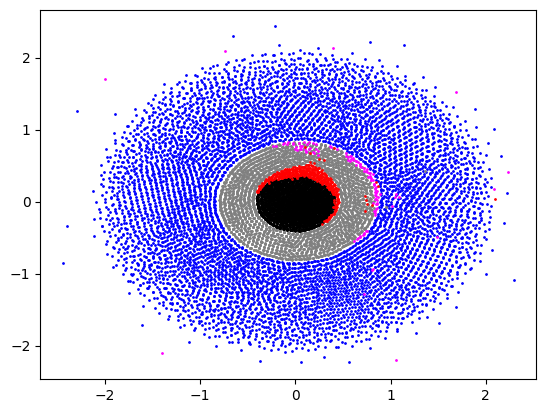

In [28]:
plt.scatter(x[z_mask & water_mask & ~impactor_mask], y[z_mask & water_mask & ~impactor_mask], s=s, c='blue')
plt.scatter(x[z_mask & forsterite_mask & ~impactor_mask], y[z_mask & forsterite_mask & ~impactor_mask], s=s, c='grey')
plt.scatter(x[z_mask & iron_mask & ~impactor_mask], y[z_mask & iron_mask & ~impactor_mask], s=s, c='black')
plt.scatter(x[z_mask & forsterite_mask & impactor_mask], y[z_mask & forsterite_mask & impactor_mask], s=s, c='magenta')
plt.scatter(x[z_mask & iron_mask & impactor_mask], y[z_mask & iron_mask & impactor_mask], s=s, c='red')
plt.show()

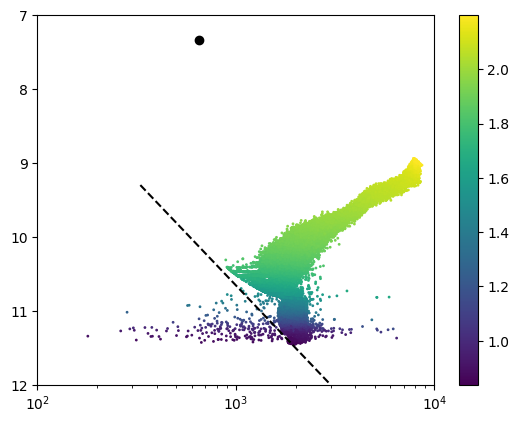

In [39]:
mask = water_mask & (r < 2.2)
plt.scatter(T[mask], np.log10(P[mask]), c=r[mask], s=1)
plt.colorbar()
plt.plot([330, 3000], [9.3, 12], 'k--')
plt.scatter(650, np.log10(22e6), c='black')
plt.xscale('log')
plt.ylim([12, 7])
plt.xlim([1e2, 1e4])
plt.show()

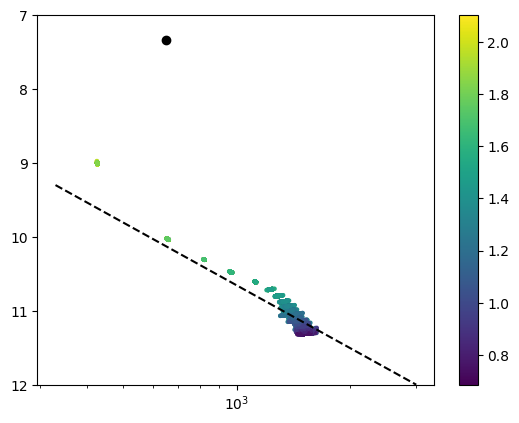

In [37]:
mask = water_mask_initial
plt.scatter(T_initial[mask], np.log10(P_initial[mask]), c=r_initial[mask], s=5)
plt.colorbar()
plt.plot([330, 3000], [9.3, 12], 'k--')
plt.scatter(650, np.log10(22e6), c='black')
plt.xscale('log')
plt.ylim([12, 7])
plt.show()

Could not find gas gamma, assuming 5./3.


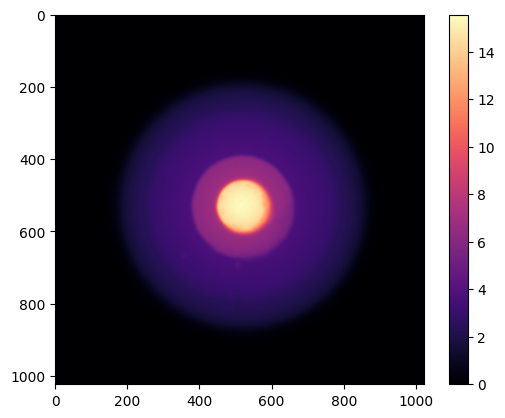

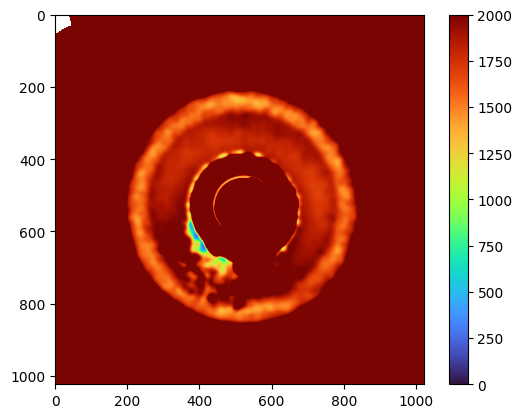

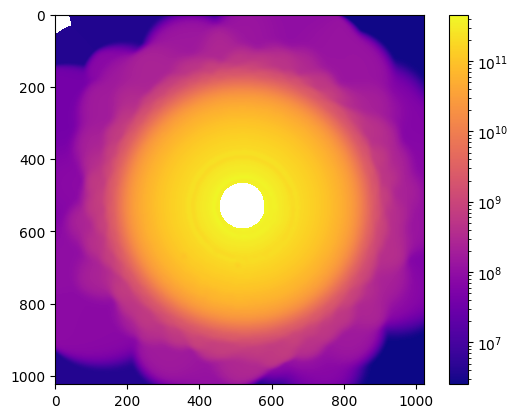

In [43]:
plot(160)